In this notebook:

* converting images between different color models
* the Fourier transform
* high-pass filters HPFs, low-pass filter (LPFs), edge detection filters, custom conv filters
* detecting shapes


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install scipy
# !pip install matplotlib

## Converting images between different color models

Light is not paint. We use additive models in computers, paintings use subtractive color model

For example:   
[0 , 255, 255] additive - YELLOW or BROWN in subtractive ( green + red )


In [3]:
# BGR represented by a triptlet of 8-bit values [0, 0, 0] - black [255, 0, 0] - blue etc..
# HSV uses different triplet of channels: 
# Hue - color tone. 
# saturation - intensity 
# and value - brightness

## Exploring the Fourier transform

All the waveforms are just the sum of simple sinusoids of different frequencies.  
In the other words, the waveforms are the sum of other waveforms

Преобразование Фурье позволяет разложить исходный сигнал на гармонические составляющие, что потребуется для выделения шумов

### HPFs and LPFs

HPF is a filter that examines a region of an image and boost the intensity of certaing pixels based on the difference in the intensity of the surrrounding pixels

HPF - это фильтр, который исследует область изображения и увеличивает интенсивность определенных пикселей на основе разницы в интенсивности окружающих пикселей

In [4]:
# High-boost filter (uses in edge detection)
HB = [[0, -0.25, 0],
     [-0.25, 1, -0.25],
     [0, -0.25, 0]]

This kernel gives the average difference in intensity between the central pixel and all its immediate horizontal neighbors. If the pixel stands out from the surrounding pixels, the resulting value will be high.

Это ядро дает среднюю разницу в интенсивности между центральным пикселем и всеми его непосредственными соседями по горизонтали. Если пиксель выделяется на фоне окружающих пикселей, результирующее значение будет высоким.

A high-pass filter is an equalization tool that removes all frequencies below a set point. In other words, a high pass filter leaves high frequencies untouched while mitigating low frequencies. 

Note: in edge detection kernel values sum = 0

In [5]:
HB

[[0, -0.25, 0], [-0.25, 1, -0.25], [0, -0.25, 0]]

In [6]:
import numpy as np

kernels_dict = {}
def create_kernel_to_dict(dimensions):
    data = []
    for _ in range(dimensions):
        row = input("Введите строку: ")
        values = row.split(',')
        data.append([float(val.strip()) for val in values])

    array = np.array(data)

    variable_name = input("Введите имя ключа для сохранения массива: ")

    #Cохраняем массив в выбранную переменную
    kernels_dict[variable_name] = array

    print(f"Массив сохранен в словарь с ключем: '{variable_name}'.")

    return array, variables_dict


In [7]:
# create_kernel_to_dict(3)

In [8]:
# create_kernel_to_dict(5)

In [9]:
import cv2
import numpy as np
from scipy import ndimage

kernel_3x3 = [[-1., -1., -1.],
        [-1.,  8., -1.],
        [-1., -1., -1.]]

kernel_5x5 = [[-1., -1., -1., -1., -1.],
        [-1.,  1.,  2.,  1., -1.],
        [-1.,  2.,  4.,  2., -1.],
        [-1.,  1.,  2.,  1., -1.],
        [-1., -1., -1., -1., -1.]]

kernel_7x7 = np.array([   
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]])

# kernel_3x3 = kernels_dict['kernel3']
# kernel_5x5 = kernels_dict['kernel5']

# 1 COLOR, 0 GRAYSC, -1 with alpha
img = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-27.jpg",0)

k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)
k7 = ndimage.convolve(img,kernel_7x7)
g_HB = ndimage.convolve(img, HB)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

blurred = cv2.GaussianBlur(img, (17,17),0)

#Best result. Differential HPF 
g_hpf = img - blurred 

# cv2.namedWindow('img', cv2.WINDOW_NORMAL)
# cv2.imshow('img',img)
# cv2.namedWindow('g_hpf', cv2.WINDOW_NORMAL)
# cv2.namedWindow('laplacian', cv2.WINDOW_NORMAL)

cv2.imshow('3x3',k3)
cv2.imshow('5x5',k5)
cv2.imshow('7x7',k7)
# cv2.imshow('blurred',blurred)
# cv2.imshow('high_boost',g_HB)
# cv2.imshow('g_hpf',g_hpf)
# cv2.imshow('laplacian',laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()


* Для каждого пикселя изображения, ядро перемещается так, чтобы центр ядра совпадал с текущим пикселем

* Значения ядра умножаются на соответствующие значения пикселей изображения.

* Результаты умножения суммируются, и это становится новым значением для текущего пикселя.

PS Для краевых значений используется паддинг или мод отображения смотри doc ndimage. 
По умолчанию == reflect ,если 1 2 3 4 | 4 3 2 1 .   
Mirror : 1 2 3 4 |3 2 1
Nearest 1 2 3 4 | 4 4 4   
Constant 1 2 3 4 | 0 0 0

(-0.5, 499.5, 449.5, -0.5)

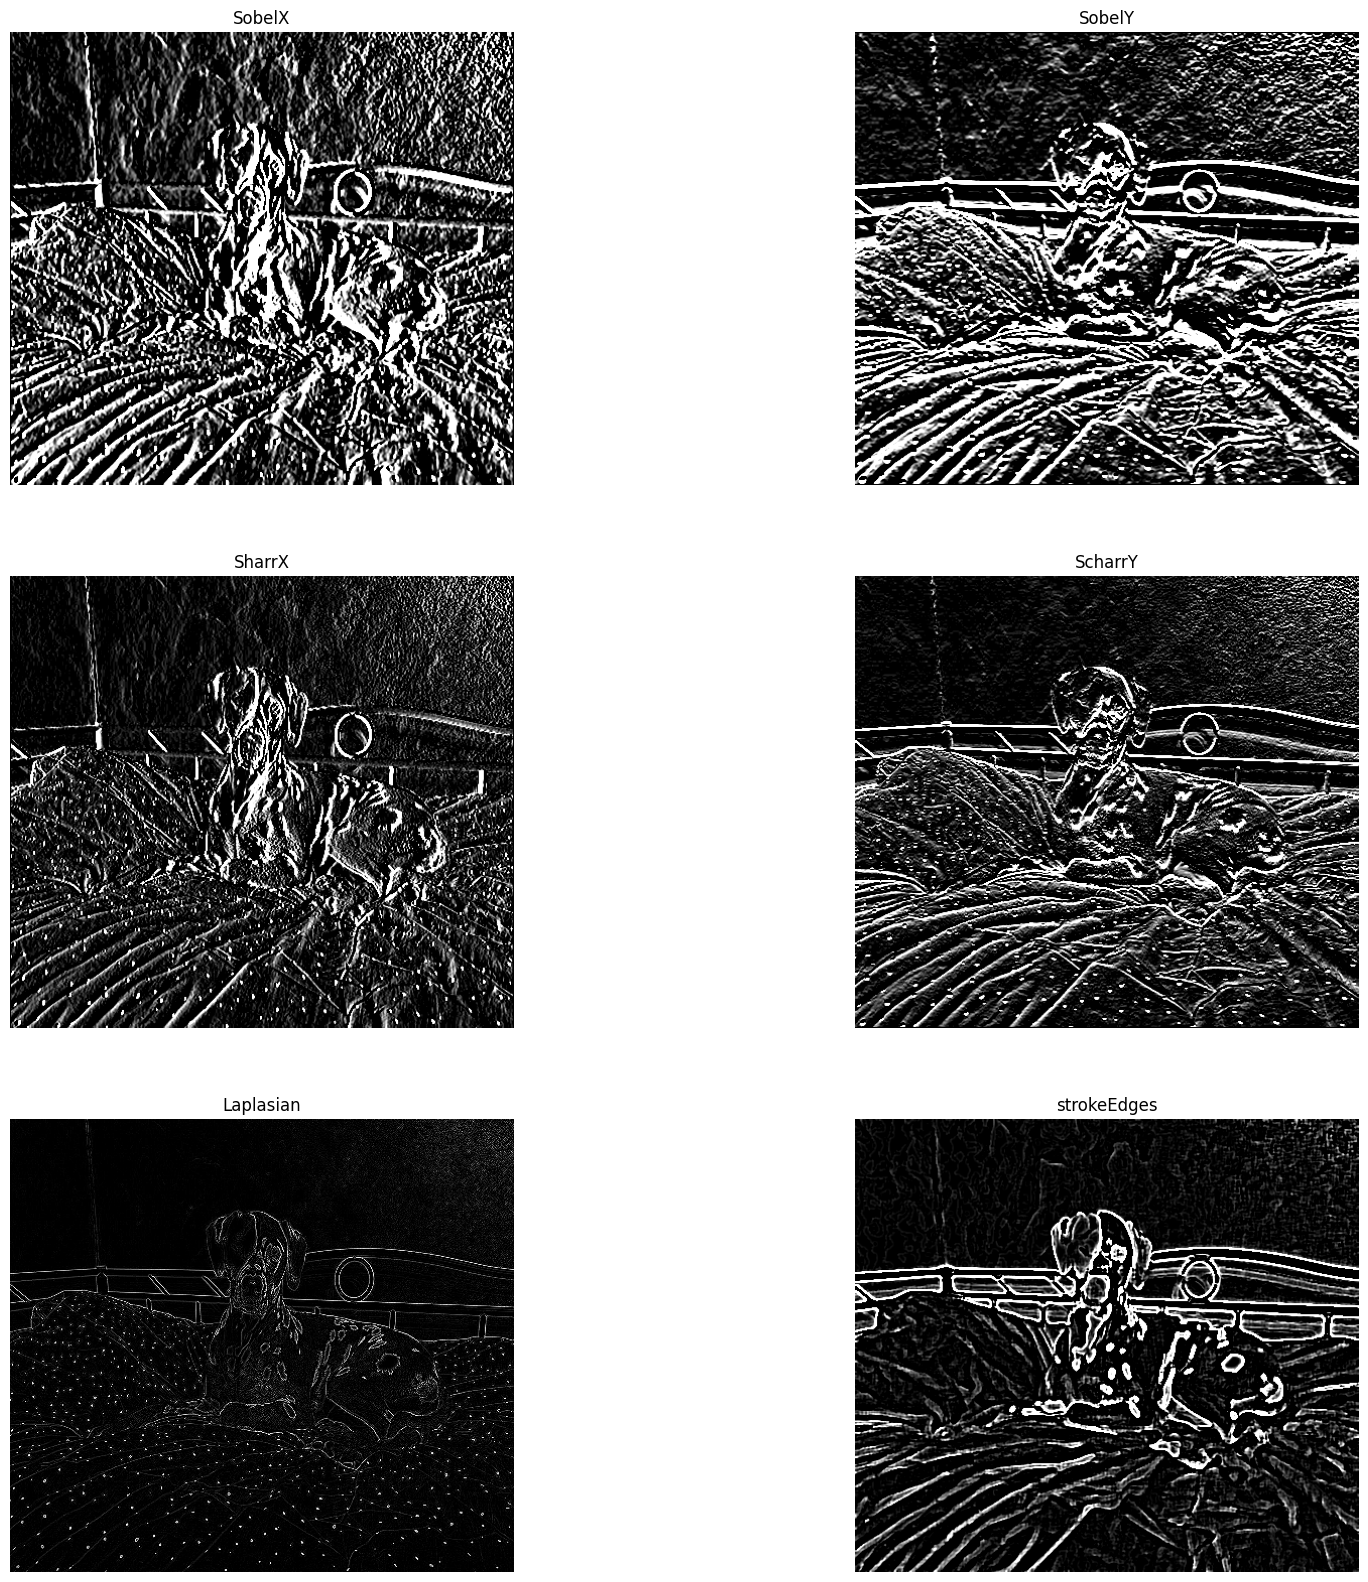

In [10]:
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-27.jpg",0)

img = cv2.resize(img, (500, 450), interpolation=cv2.INTER_CUBIC)

k5 = cv2.resize(k5, (500, 450), interpolation=cv2.INTER_CUBIC)
k3 = cv2.resize(k3, (500, 450), interpolation=cv2.INTER_CUBIC)
k7 = cv2.resize(k7, (500, 450), interpolation=cv2.INTER_CUBIC)

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5) 
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_8U)
scharrx = cv2.Scharr(img, cv2.CV_8U, 1, 0) 
scharry = cv2.Scharr(img, cv2.CV_8U, 0, 1)


blurred_median = cv2.medianBlur(img,7)
strokeEdges = cv2.Laplacian(blurred_median,cv2.CV_8U,blurred_median, ksize=5)


# plot images
plt.subplots(3,2,figsize=(20,20))

plt.subplot(3, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('SobelX')
plt.axis('off') 

plt.subplot(3, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('SobelY')
plt.axis('off') 

  
plt.subplot(3, 2, 3)
plt.imshow(scharrx, cmap='gray')
plt.title('SharrX')
plt.axis('off') 

plt.subplot(3, 2, 4)
plt.imshow(scharry, cmap='gray')
plt.title('ScharrY')
plt.axis('off') 

plt.subplot(3, 2, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplasian')
plt.axis('off') 

plt.subplot(3, 2, 6)
plt.imshow(strokeEdges, cmap='gray')
plt.title('strokeEdges')
plt.axis('off') 

# cv2.imshow('sobelx',sobelx)
# cv2.imshow('sobely',sobely)
# cv2.imshow('laplacian',laplacian)
# cv2.imshow('hpf',g_hpf)
  

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Лапласиан – это оператор, который применяется к изображению для обнаружения скачков яркости или границ. В обработке изображений Лапласиан может быть выражен как сумма вторых производных по x и y:

Лапласиан = ∂²f/∂x² + ∂²f/∂y²

где f - это функция интенсивности изображения.


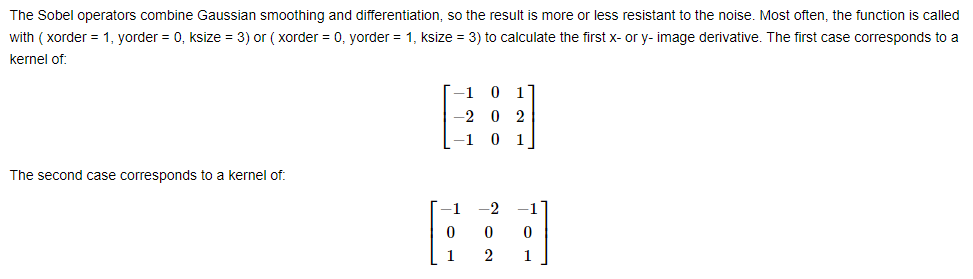


This filters turns non-edge regions into black and edge into white or saturated colors. However, they are prone to misidentify noise as edges. This can be mitigated by blurring an image before trying to find edges(blur,median,gausian).Right image in the bottom called 'strokeEdges' shows laplasian after median blur.

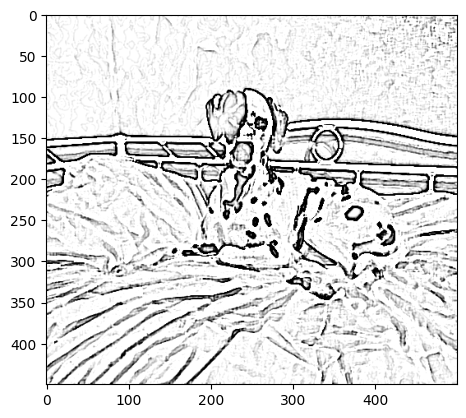

In [11]:
#Invers

normalizedInverseAlpha = ( 1.0 / 255 ) * (255 - strokeEdges)

plt.imshow(normalizedInverseAlpha, cmap = 'gray')

Should remember that cv2 works with BGR format , matplotlib expects RGB to show

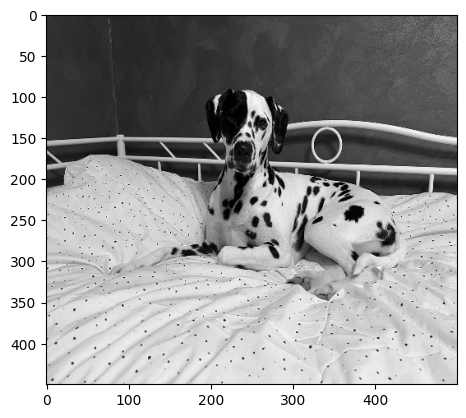

In [12]:
#Original image in Matplotlib .

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Filter 2d

For color images filter2D() applies kernel qequally to each channel. To use different kernels on different channels use the split() and merge() functions 

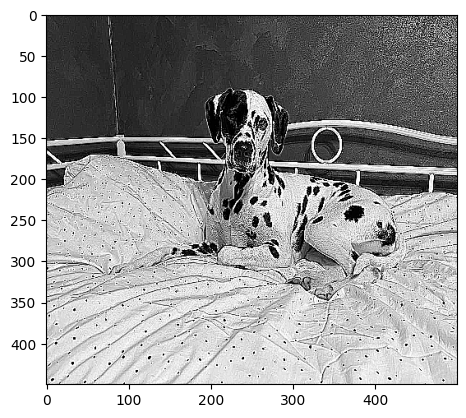

In [13]:
# Sharpening

img_copy = img.copy()

kernel = np.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]
])

# Note that wheights of sharpen kernel sum == 1 , when edge detection kernel has 0 instead.

pic = cv2.filter2D(img_copy,-1,kernel,img_copy)
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)

The emboss filter, also called a directional difference filter, will enhance edges in the direction of the selected convolution mask(s)

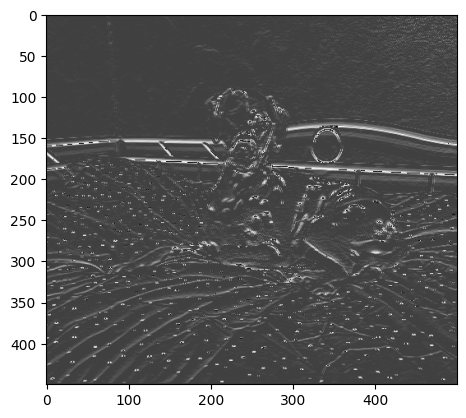

In [15]:
#EmbossFilter
#Positive weights blurs and negative weights -sharpen


img_copy = img.copy()

kernel_emboss_l = np.array([
            [1, 0, 1],
            [0, 0, 0],
            [-1, 0, -1]
        ])

pic_el = cv2.filter2D(img_copy,-1,kernel_emboss_l,img_copy)
pic_el = cv2.cvtColor(pic_el, cv2.COLOR_BGR2RGB)

# Для ограничения значений пикселей в диапазоне от 0 до 255 после добавления значения яркости.

brightness_value = 64
pic_el = np.clip(pic_el + brightness_value, 0, 255).astype(np.uint8)

plt.imshow(pic_el)

In [ ]:
#EmbossFilter
#Positive weights blurs and negative weights -sharpen

img_copy = img.copy()

kernel_emboss_r = np.array([
            [2, 1, 0],
            [1, 1, -1],
            [0, -1, -2]
        ])

pic_er = cv2.filter2D(img_copy,-1,kernel_emboss_r,img_copy)
pic_er = cv2.cvtColor(pic_er, cv2.COLOR_BGR2RGB)
plt.imshow(pic_er)

## Edge detection with Canny

Canny is 5 step algorithm:
1. Denoise with gausian blur
2. Calculate the gradients
3. Apply nin-maximum supression (NMS) on the edges
4. Apply double thehold to all the detected edges to eliminate any false positives
5. Analyze all the edges and their connections to each other to keep the real edges and discard the weak ones.

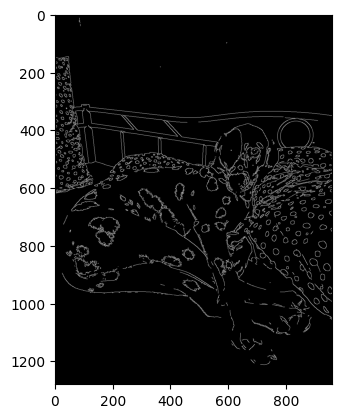

In [18]:
import cv2
import numpy as np

img_v = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-11.jpg",0)

canny_result = cv2.Canny(img_v, 200, 300)

canny_pic = cv2.cvtColor(canny_result, cv2.COLOR_BGR2RGB)
plt.imshow(canny_pic)

In [25]:
# cv2.imwrite('canny_pic.jpg',canny_pic)

True

### Gradients

Расчет градиентов - это процесс вычисления производных изображения, который помогает нам определить, где происходят резкие изменения яркости (градиенты) на изображении. Градиенты представляют собой направления и интенсивности наибольших изменений яркости в каждой точке изображения

Kernel для градиента по горизонтали   
-1  0  1  
-2  0  2  
-1  0  1  

Kernel для градиента по вертикали  
-1 -2 -1  
 0  0  0  
 1  2  1  
 
Для расчета градиентов по горизонтали и вертикали, мы применяем свертку изображения с соответствующими фильтрами.  

Затем, для каждого пикселя, вычисляем интенсивность градиента и его направление, используя формулы:  
Gradient Magnitude (M) = sqrt(Gx^2 + Gy^2)  
Gradient Angle (θ) = atan2(Gy, Gx)  

Значение M представляет собой интенсивность градиента в каждой точке изображения, а значение θ - его направление. По сути, M говорит нам о том, насколько резко меняется яркость, а θ определяет направление наибольшего изменения яркости.


#### Gradient map

Карта градиента представляет собой изображение, в котором каждый пиксель имеет определенное значение градиента и его направление. Каждый пиксель на карте градиента представляет собой вектор градиента с двумя компонентами: интенсивность градиента и его направление.

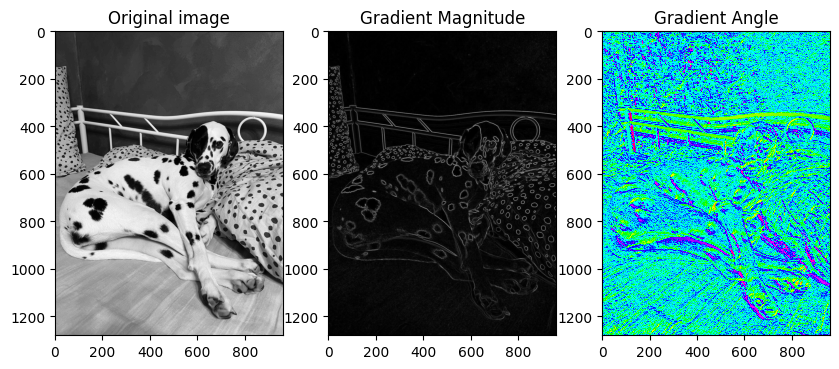

True

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузите изображение в оттенках серого
img_v = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-11.jpg", 0)

# Применим оператор Собеля для расчета градиентов
gradient_x = cv2.Sobel(img_v, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img_v, cv2.CV_64F, 0, 1, ksize=3)

# Вычислим интенсивность градиента и его направление
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_angle = np.arctan2(gradient_y, gradient_x)

# Визуализируем карту градиента
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_v, cmap='gray')
plt.title('Original image')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(gradient_angle, cmap='hsv')
plt.title('Gradient Angle')
plt.show()

# cv2.imwrite('Ggradient-magnitude.jpg',gradient_magnitude)

В этом коде мы используем функции свертки cv2.Sobel() для вычисления градиентов по горизонтали и вертикали. Затем мы вычисляем интенсивность градиента и его направление с помощью numpy. Визуализируем интенсивность градиента как оттенки серого на одном графике и направление градиента как цветовой тон на другом графике, используя цветовую карту HSV (значение цветового тона соответствует углу направления градиента).

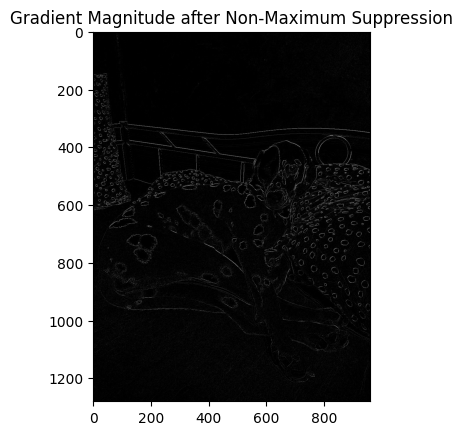

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузите изображение в оттенках серого
img_v = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-11.jpg", 0)

# оператор Собеля для расчета градиентов
gradient_x = cv2.Sobel(img_v, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img_v, cv2.CV_64F, 0, 1, ksize=3)

# интенсивность градиента и его направление
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_angle = np.arctan2(gradient_y, gradient_x)


gradient_magnitude_nms = np.copy(gradient_magnitude)

for y in range(1, gradient_magnitude.shape[0] - 1):
    for x in range(1, gradient_magnitude.shape[1] - 1):
        angle = gradient_angle[y, x]
        m = gradient_magnitude[y, x]

        """
        Проведем линейную интерполяцию в направлении градиента
        Если интенсивность градиента в направлении градиента меньше соседей , то сводим пиксель на 0.
        
        
        """
       
        if (0 <= angle < np.pi/4) or (7*np.pi/4 <= angle <= 2*np.pi):
            q, r = gradient_magnitude[y, x+1], gradient_magnitude[y, x-1] #Вправо
        elif (np.pi/4 <= angle < 3*np.pi/4):
            q, r = gradient_magnitude[y+1, x-1], gradient_magnitude[y-1, x+1] #Вверх
        elif (3*np.pi/4 <= angle < 5*np.pi/4):
            q, r = gradient_magnitude[y+1, x], gradient_magnitude[y-1, x] #Влево
        else:
            q, r = gradient_magnitude[y-1, x-1], gradient_magnitude[y+1, x+1] #Вниз

        # Применяем non-maximum suppression
        if (m <= q) or (m <= r):
            gradient_magnitude_nms[y, x] = 0


plt.imshow(gradient_magnitude_nms, cmap='gray')
plt.title('Gradient Magnitude after Non-Maximum Suppression')
plt.show()

# cv2.imwrite('gradient_magnitude_nms.jpg',gradient_magnitude_nms)

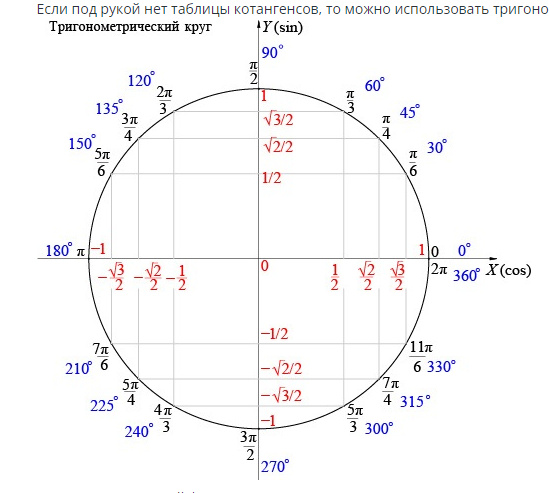

Значения q и r вычисляются для двух соседних пикселей X и Y в направлении градиента, и затем используются в алгоритме "non-maximum suppression" для определения, является ли текущий пиксель точкой грани. Если интенсивность градиента текущего пикселя m меньше или равна одному из интерполированных значений q или r, то текущий пиксель (y, x) становится равным нулю в массиве gradient_magnitude_nms, что означает, что он не является точкой грани.

как вычисляются значения q и r в разных направлениях относительно текущего пикселя (y, x).

Если угол angle лежит в диапазоне от 0 до π/4 радиан или от 7π/4 до 2π радиан:
Это означает, что градиент ближе к горизонтальному направлению (слева направо). В этом случае, мы интерполируем значения градиента между пикселями (y, x+1) и (y, x-1). Значение q соответствует пикселю вправо от (y, x), а значение r соответствует пикселю влево от (y, x).

Если угол angle лежит в диапазоне от π/4 до 3π/4 радиан:
Это означает, что градиент ближе к вертикальному направлению (сверху вниз). В этом случае, мы интерполируем значения градиента между пикселями (y+1, x-1) и (y-1, x+1). Значение q соответствует пикселю вверх и влево от (y, x), а значение r соответствует пикселю вниз и вправо от (y, x).

Если угол angle лежит в диапазоне от 3π/4 до 5π/4 радиан:
Это означает, что градиент ближе к горизонтальному направлению (справа налево). В этом случае, мы интерполируем значения градиента между пикселями (y+1, x) и (y-1, x). Значение q соответствует пикселю вниз от (y, x), а значение r соответствует пикселю вверх от (y, x).

В остальных случаях угол angle лежит в диапазоне от 5π/4 до 7π/4 радиан:
Это означает, что градиент ближе к вертикальному направлению (снизу вверх). В этом случае, мы интерполируем значения градиента между пикселями (y-1, x-1) и (y+1, x+1). Значение q соответствует пикселю вверх и влево от (y, x), а значение r соответствует пикселю вниз и вправо от (y, x).

Таким образом, используя линейную интерполяцию в различных направлениях, мы находим значения градиента q и r, которые соответствуют соседним пикселям в направлении градиента. Затем эти значения q и r используются в алгоритме "non-maximum suppression" для определения, является ли текущий пиксель точкой грани. Если интенсивность градиента текущего пикселя меньше или равна одному из интерполированных значений q или r, то текущий пиксель (y, x) становится равным нулю в массиве gradient_magnitude_nms, что означает, что он не является точкой грани.

### Double threhold

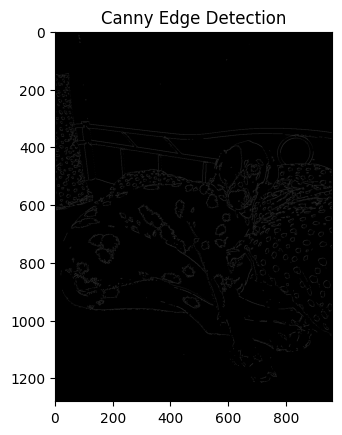

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def hysteresis_threshold(image, strong_edges, weak_edges):
    height, width = image.shape
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if strong_edges[y, x]:
                image[y, x] = 255
            elif weak_edges[y, x]:
                # Проверяем наличие сильной грани в 8 соседних пикселях
                if (strong_edges[y - 1:y + 2, x - 1:x + 2].any()):
                    image[y, x] = 255
                else:
                    image[y, x] = 0
            else:
                image[y, x] = 0


# Загрузите изображение в оттенках серого
img_v = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-11.jpg", 0)

# Примените оператор Собеля для расчета градиентов
gradient_x = cv2.Sobel(img_v, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img_v, cv2.CV_64F, 0, 1, ksize=3)

# Вычислите интенсивность градиента и его направление
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_angle = np.arctan2(gradient_y, gradient_x)

# Примените non-maximum suppression (NMS)
gradient_magnitude_nms = np.copy(gradient_magnitude)

for y in range(1, gradient_magnitude.shape[0] - 1):
    for x in range(1, gradient_magnitude.shape[1] - 1):
        angle = gradient_angle[y, x]
        m = gradient_magnitude[y, x]

        # Продолжим линейную интерполяцию в направлении градиента
        if (0 <= angle < np.pi/4) or (7*np.pi/4 <= angle <= 2*np.pi):
            q, r = gradient_magnitude[y, x+1], gradient_magnitude[y, x-1]
        elif (np.pi/4 <= angle < 3*np.pi/4):
            q, r = gradient_magnitude[y+1, x-1], gradient_magnitude[y-1, x+1]
        elif (3*np.pi/4 <= angle < 5*np.pi/4):
            q, r = gradient_magnitude[y+1, x], gradient_magnitude[y-1, x]
        else:
            q, r = gradient_magnitude[y-1, x-1], gradient_magnitude[y+1, x+1]

        # Применяем non-maximum suppression
        if (m <= q) or (m <= r):
            gradient_magnitude_nms[y, x] = 0

# Примените двойной порог
lower_threshold = 50
upper_threshold = 200 # Чем меньше тем больше деталей, чем больше тем четче главные границы
strong_edges = (gradient_magnitude_nms > upper_threshold)
weak_edges = ((gradient_magnitude_nms >= lower_threshold) & (gradient_magnitude_nms <= upper_threshold))

# Hysteresis Thresholding для связывания слабых граней с сильными гранями
hysteresis_threshold(gradient_magnitude_nms, strong_edges, weak_edges)


plt.imshow(gradient_magnitude_nms, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


In [45]:
# cv2.imwrite('gradient_magnitude_nms_threeholded7.jpg',gradient_magnitude_nms)

True

## Canny from scratch 

In [47]:
import cv2
import numpy as np

def non_max_suppression(gradient_magnitude, gradient_angle):
    gradient_magnitude_nms = np.copy(gradient_magnitude)

    for y in range(1, gradient_magnitude.shape[0] - 1):
        for x in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_angle[y, x]
            m = gradient_magnitude[y, x]

            # Продолжим линейную интерполяцию в направлении градиента
            if (0 <= angle < np.pi/4) or (7*np.pi/4 <= angle <= 2*np.pi):
                q, r = gradient_magnitude[y, x+1], gradient_magnitude[y, x-1] #Вправо
            elif (np.pi/4 <= angle < 3*np.pi/4):
                q, r = gradient_magnitude[y+1, x-1], gradient_magnitude[y-1, x+1] #Вверх
            elif (3*np.pi/4 <= angle < 5*np.pi/4):
                q, r = gradient_magnitude[y+1, x], gradient_magnitude[y-1, x] #Влево
            else:
                q, r = gradient_magnitude[y-1, x-1], gradient_magnitude[y+1, x+1] #Вниз

            # Применяем non-maximum suppression
            if (m <= q) or (m <= r):
                gradient_magnitude_nms[y, x] = 0

    return gradient_magnitude_nms


def canny(image, lower_threshold, upper_threshold):
    # Шаг 1: Вычислить горизонтальные и вертикальные градиенты с помощью оператора Собеля
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Шаг 2: Вычислить магнитуду и угол градиента
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_angle = np.arctan2(gradient_y, gradient_x)

    # Шаг 3: Применить non-maximum suppression
    gradient_magnitude_nms = non_max_suppression(gradient_magnitude, gradient_angle)

    # Шаг 4: Применить double thresholding
    strong_edges = gradient_magnitude_nms > upper_threshold
    weak_edges = (gradient_magnitude_nms >= lower_threshold) & (gradient_magnitude_nms <= upper_threshold)

    # Шаг 5: Отслеживание границ с помощью алгоритма гистерезиса
    edges = np.zeros_like(image)
    edges[strong_edges] = 255

    while np.sum(weak_edges) > 0:
        y, x = np.where(weak_edges)
        for i in range(len(y)):
            edges[y[i], x[i]] = 255
            weak_edges[y[i], x[i]] = 0

            # Рекурсивно распространить по сильным границам
            neighborhood = weak_edges[y[i]-1:y[i]+2, x[i]-1:x[i]+2]
            if np.any(strong_edges[y[i]-1:y[i]+2, x[i]-1:x[i]+2]):
                yy, xx = np.where(neighborhood)
                y_w = yy + (y[i] - 1)
                x_w = xx + (x[i] - 1)
                edges[y_w, x_w] = 255
                weak_edges[y_w, x_w] = 0

    return edges

# Пример использования
pic_img = cv2.imread(r"C:\Users\johnw\Pictures\Factory_art\001_6917.jpg", 0)  # Загрузить изображение в оттенках серого
canny_edges = canny(pic_img, lower_threshold=50, upper_threshold=200)
cv2.imwrite("canny_edges_sof.jpg", canny_edges)


True

In [49]:
canny_result = cv2.Canny(pic_img, 200, 300)

canny_pic = cv2.cvtColor(canny_result, cv2.COLOR_BGR2RGB)
cv2.imwrite("canny_edges_sof1.jpg", canny_edges)

True

In [ ]:
# Result is the same